In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import pickle
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
import pandas as pd

plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Arial"

import matplotlib as mpl

mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["mathtext.fontset"] = "custom"
mpl.rcParams["mathtext.rm"] = "Arial"
mpl.rcParams["mathtext.it"] = "Arial:italic"
mpl.rcParams["mathtext.bf"] = "Arial:bold"




cve
[H][H] [-1.70845244 -0.41104349]
C=C [-1.89936352 -0.44545206]
C=CC=C [-2.28456728 -0.5443218 ]
C=CC(=C)C=C [-2.51407186 -0.91664397]
C#CC=CC(=C)C=C [-3.1872555  -1.30684684]
C#CC=CC(C=C)=CC=C [-3.19863031 -1.32906151]
C#CC=CC(=CC=C)C(=C)C#C [-3.30209918 -1.47199302]
C#CC#CC(=C)C(C=CC#C)=CC=C [-3.38071268 -1.60087141]
C#CC#Cc1ccccc1C=CC#C [-2.16280231  0.09714672]
C#CC=Cc1ccccc1C#CC#CC=C [-2.5720694  -0.06666648]
C#CC=Cc1c(C#CC#CC=C)cccc1C=C [-2.81402799  0.12797091]
C#CC(C=C)=Cc1c(C#CC#CC=C)cccc1C=C [-2.9937886  -0.17790766]
C#CC(C=C)=Cc1c(C#CC#CC=C)ccc(C=C)c1C=C [-3.23071926 -0.51397625]
C#CC(C=C)=Cc1c(C#CC#CC=C)ccc2ccccc12 [-1.57880768 -0.4855739 ]
C#CC(C=C)=Cc1c(C#CC#CC=CC=C)ccc2ccccc12 [-1.66645639 -0.60605196]
C#CC(C=C)=Cc1c(C#CC#CC=CC=CC=C)ccc2ccccc12 [-1.68863698 -0.64190219]
C#CC(C=C)=Cc1c(C#CC#CC=CC(C=C)=CC=C)ccc2ccccc12 [-1.69759978 -0.7108578 ]
C#CC(C=C)=Cc1c(C#CC#Cc2cccc(C=C)c2)ccc2ccccc12 [-1.37697887  0.43440957]
C#CC(C=C)=Cc1c(C#CC#Cc2cccc(C=C)c2C=C)ccc2ccccc12 [-1.

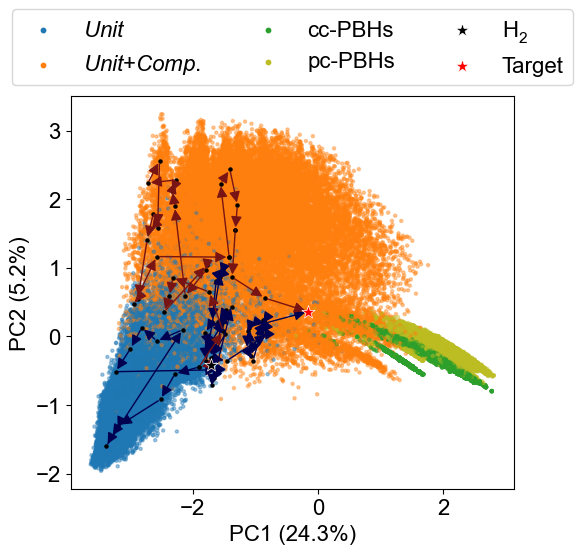

In [ ]:
with open("../data/3_PCA/pts.pkl", "rb") as f:
    pts = pickle.load(f)

with open("../data/3_PCA/cols.pkl", "rb") as f:
    cols = pickle.load(f)

with open("../data/3_PCA/labels_all.pkl", "rb") as f:
    labels_all = pickle.load(f)

fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]

import matplotlib.pyplot as plt

with open("../data/3_PCA/PCA.pkl", "rb") as f:
    pca = pickle.load(f)

color_dict = {
    "COMPAS-1": "tab:green",
    "COMPAS-3x": "tab:olive",
    "cve": "tab:blue",
    "cve24p": "tab:orange"
}

label_dict = {
    "cve": r"$\mathit{Unit}$",
    "cve24p": r"$\mathit{Unit}$+$\mathit{Comp.}$",
    "COMPAS-1": r"cc-PBHs",
    "COMPAS-3x": r"pc-PBHs",
}


fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

idx = 22
name = "mobiusannulene"
smi = "C1#Cc2ccc3ccccc3c2-c2c(ccc3ccccc23)C#CC#Cc2ccc3ccccc3c2-c2c(ccc3ccccc23)C#CC#Cc2ccc3ccccc3c2-c2c(ccc3ccccc23)C#C1"
plt.figure(figsize=(6, 6))
plt.scatter(pts[:, 0], pts[:, 1], c=cols, s=5, alpha=0.4)
for k in label_dict.keys():
    plt.scatter([], [], c=color_dict[k], label=label_dict[k], s=10)

for op_name in ["cve","cve24p"]:
    print(op_name)
    for seed in range(42,43):
        smis = []
        coords = []
        df = pd.read_csv(f"../data/2_rediscovery/hillclimb/substructure_{idx}_{name}_{op_name}_{seed}.csv")
        for smi,score in zip(df["SMILES"],df["Score"]):
            if score is not None and score > -0.5:
                smis.append(smi)
                coords.append(np.array(fpgen.GetFingerprint(Chem.MolFromSmiles(smi))))
        coords = np.array(coords)
        coords = pca.transform(coords)
        
        for smi,coord in zip(smis,coords):
            print(smi, coord)

        plt.scatter(coords[:,0],coords[:,1],c="black", s=5)
        for i in range(len(coords) - 1):
            plt.annotate(
                "",
                xy=(coords[i+1,0], coords[i+1,1]),
                xytext=(coords[i,0], coords[i,1]),
                arrowprops=dict(
                    arrowstyle="-|>",
                    lw=1,
                    color=(0/255,0/255,80/255) if op_name == "cve" else (120/255,20/255,20/255),
                    alpha=1
                ),
            )

h2_fp = [np.array(fpgen.GetFingerprint(Chem.MolFromSmiles("[H][H]")))]
h2_pca = pca.transform(h2_fp)

plt.scatter(h2_pca[:, 0], h2_pca[:, 1], c="black", marker="*",edgecolors="white", linewidths=0.5, s=100, label=r"H$_{2}$",zorder=3)

target_fp = [np.array(fpgen.GetFingerprint(Chem.MolFromSmiles(smi)))]
target_pca = pca.transform(target_fp)

plt.scatter(target_pca[:, 0], target_pca[:, 1], c="red", marker="*",edgecolors="white", linewidths=0.5, s=100, label=r"Target",zorder=3)

plt.xlabel("PC1 (24.3%)")
plt.ylabel("PC2 (5.2%)")
plt.legend(
loc="upper center",
bbox_to_anchor=(0.5, 1.25),
ncol=3
)
plt.tight_layout()

plt.savefig(f"../data/4_trajectory/{idx}_{name}_traj_single.png", format="png", dpi=300)
plt.show()


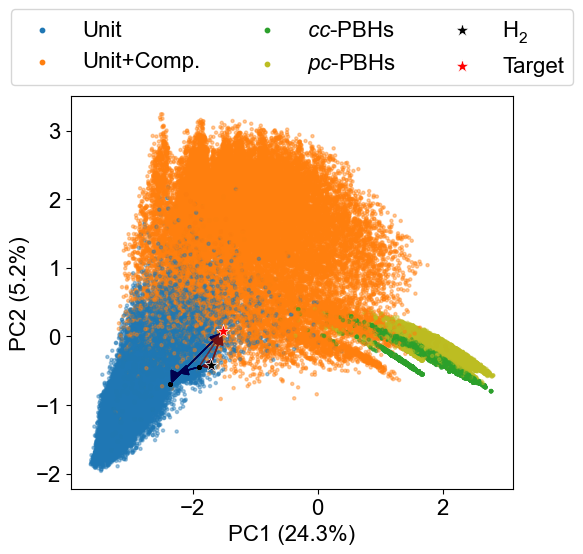

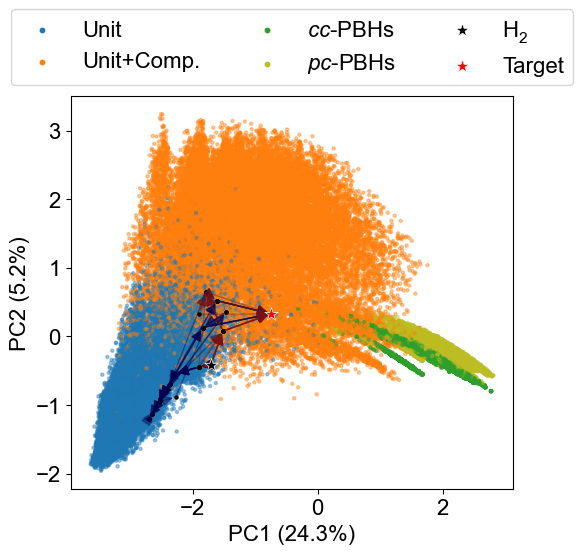

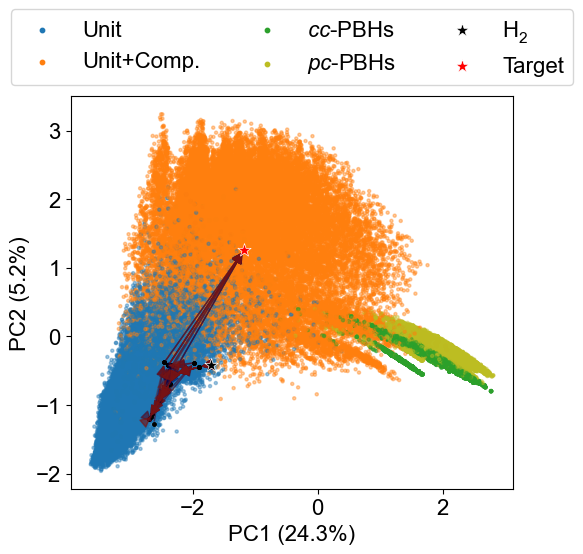

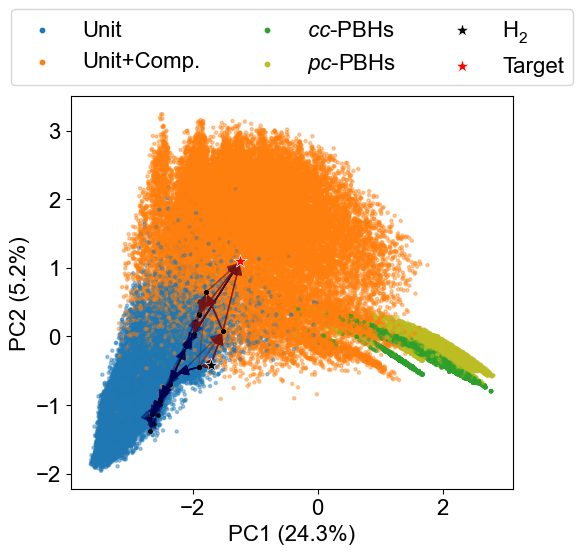

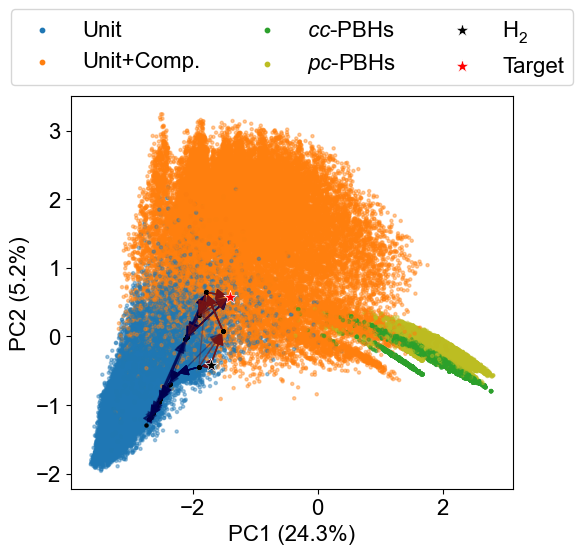

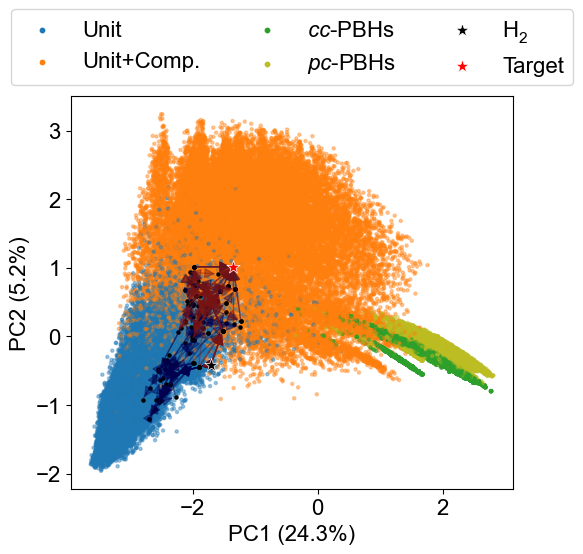

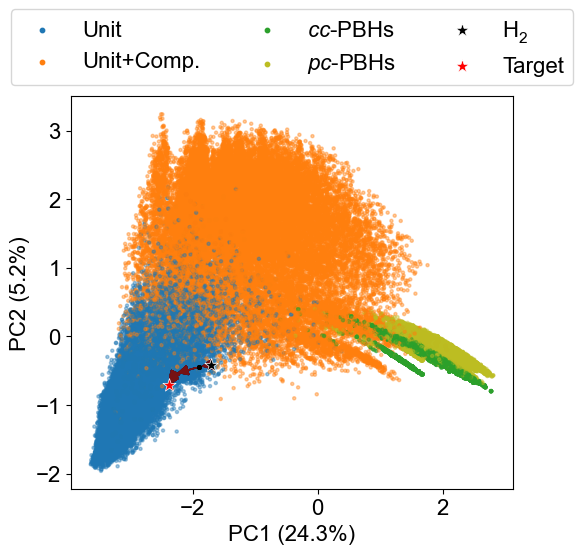

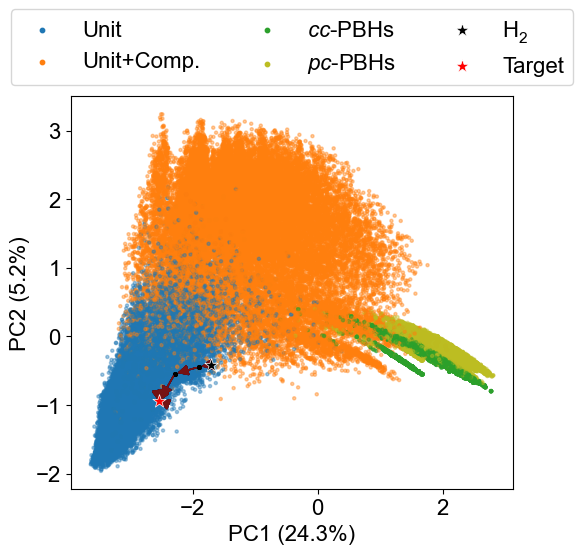

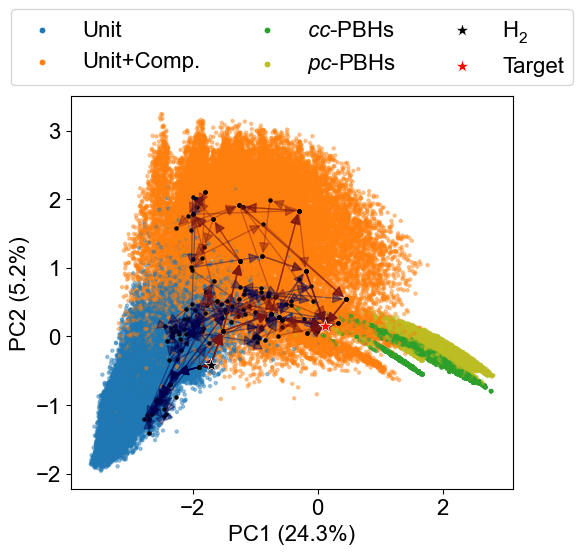

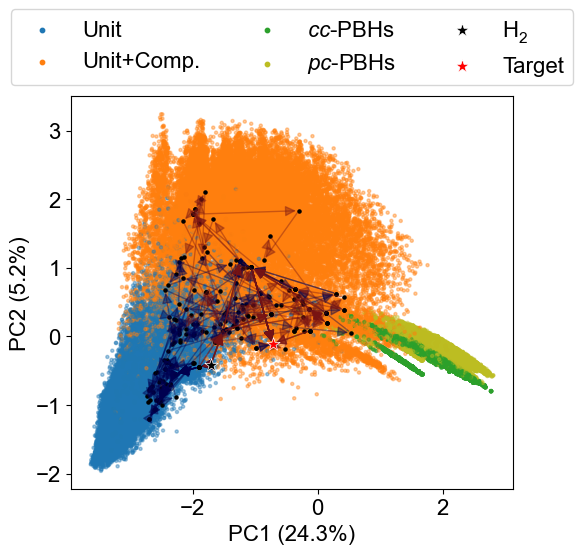

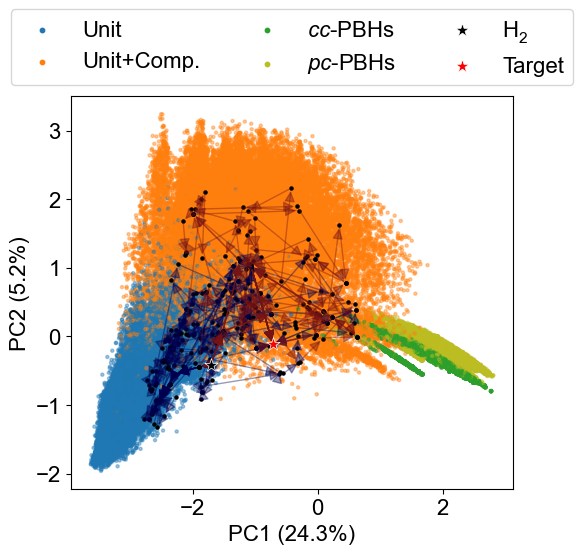

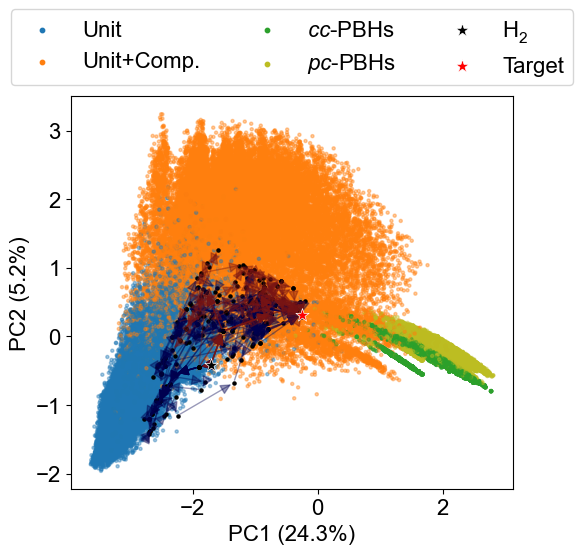

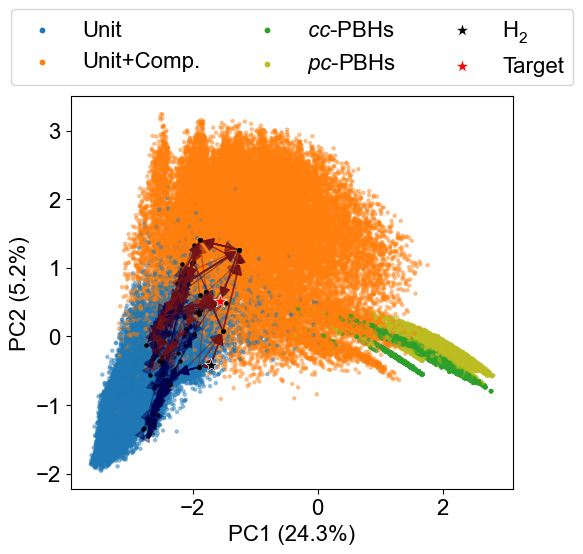

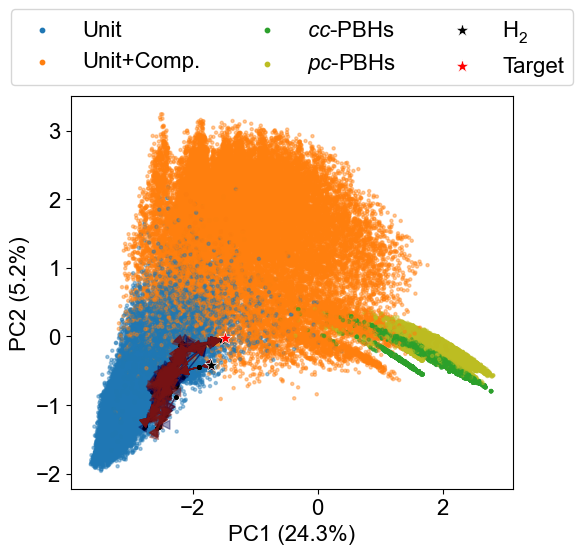

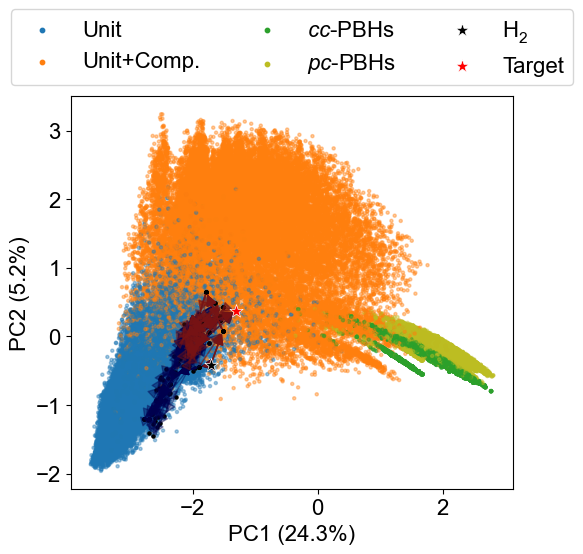

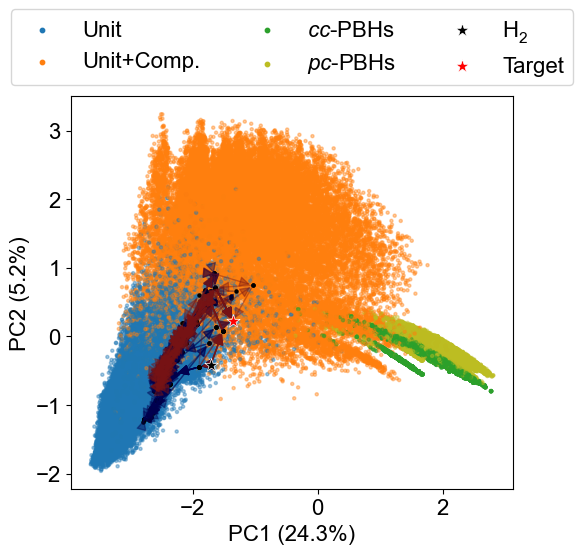

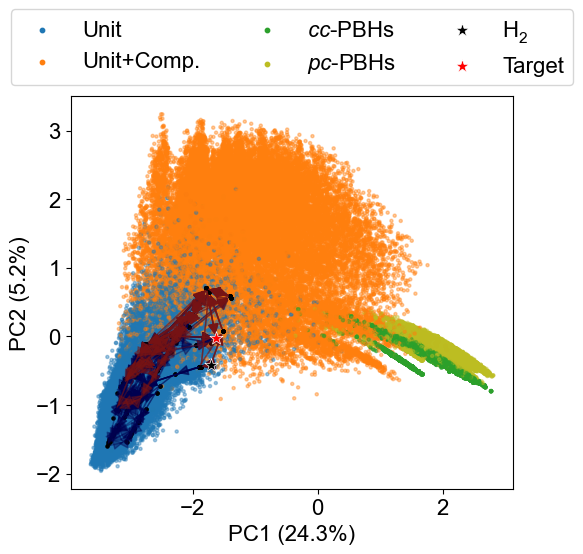

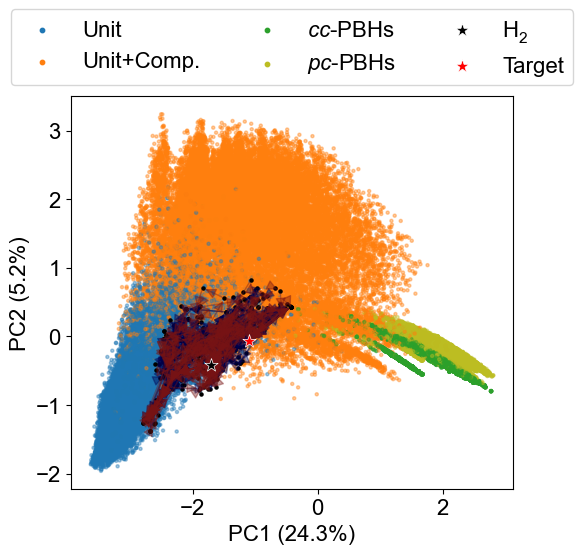

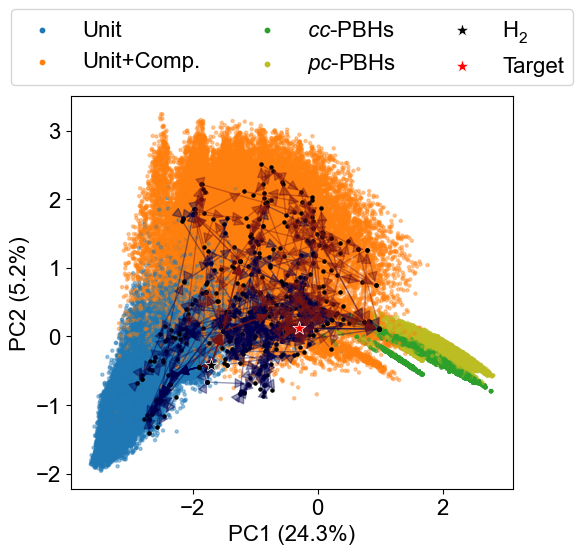

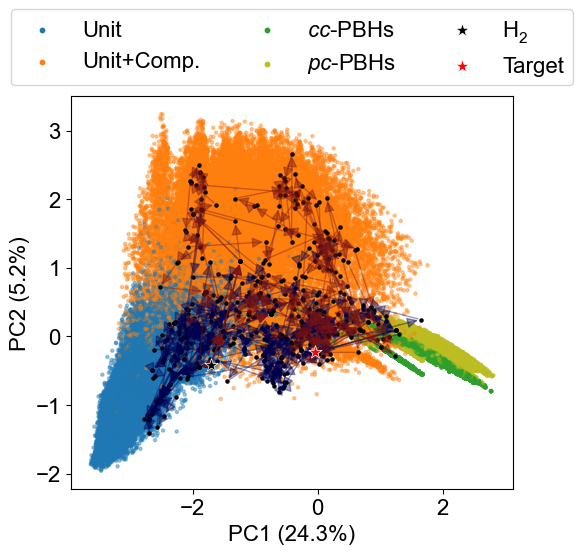

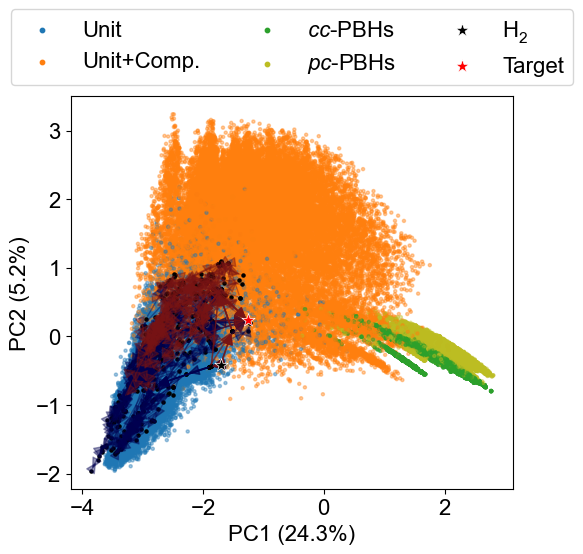

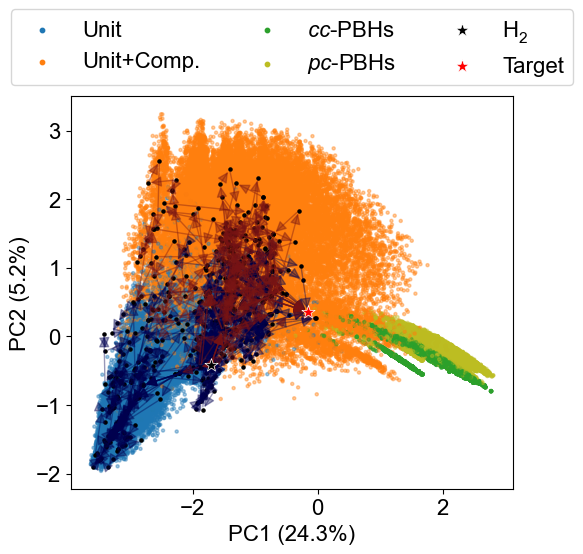

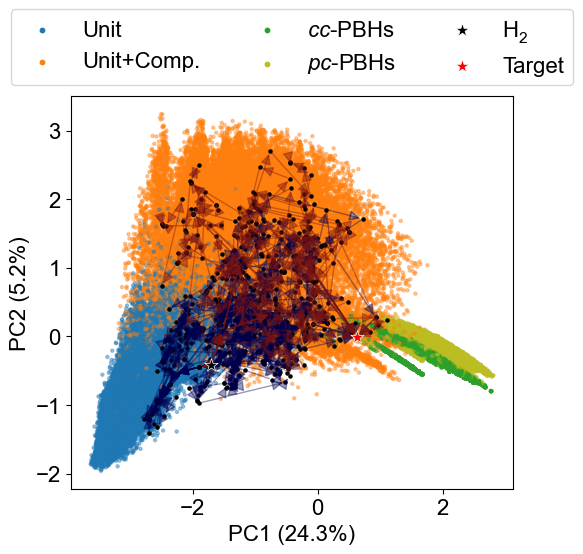

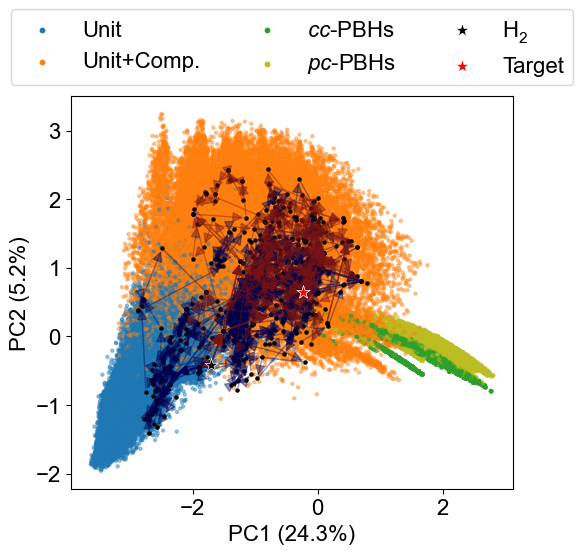

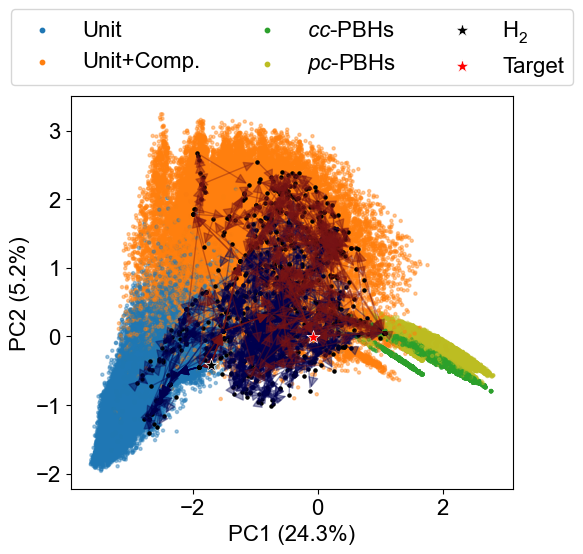

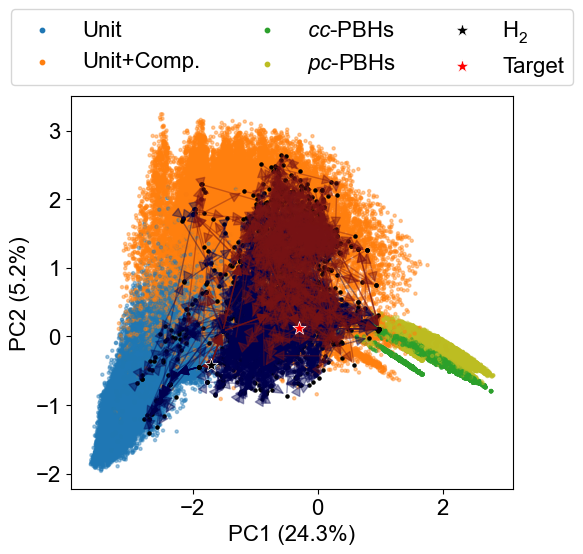

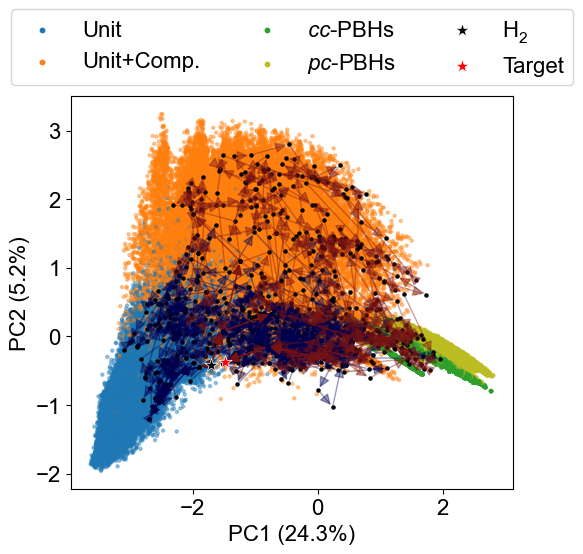

In [ ]:
with open("../data/3_PCA/pts.pkl", "rb") as f:
    pts = pickle.load(f)

with open("../data/3_PCA/cols.pkl", "rb") as f:
    cols = pickle.load(f)

with open("../data/3_PCA/labels_all.pkl", "rb") as f:
    labels_all = pickle.load(f)

fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

filenames = ["COMPAS-1","COMPAS-3x","cve","cve24p"]

import matplotlib.pyplot as plt

with open("../data/3_PCA/PCA.pkl", "rb") as f:
    pca = pickle.load(f)

color_dict = {
    "COMPAS-1": "tab:green",
    "COMPAS-3x": "tab:olive",
    "cve": "tab:blue",
    "cve24p": "tab:orange"
}

label_dict = {
    "cve": "Unit",
    "cve24p": "Unit+Comp.",
    "COMPAS-1": r"$\mathit{cc}$-PBHs",
    "COMPAS-3x": r"$\mathit{pc}$-PBHs",
}


fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=2048)

with open('../data/target_molecules.csv', encoding='utf-8-sig', newline='') as f:
    items = f.read().split("\r\n")
    items = [tuple(item.split(",")) for item in items[:27]]

for i,(idx,name,smi) in enumerate(items):
    plt.figure(figsize=(6, 6))
    plt.scatter(pts[:, 0], pts[:, 1], c=cols, s=5, alpha=0.4)
    for k in label_dict.keys():
        plt.scatter([], [], c=color_dict[k], label=label_dict[k], s=10)

    for op_name in ["cve","cve24p"]:
        for seed in range(42,52):
            coords = []
            df = pd.read_csv(f"../data/2_rediscovery/hillclimb/substructure_{idx}_{name}_{op_name}_{seed}.csv")
            for smi,score in zip(df["SMILES"],df["Score"]):
                if score is not None and score > -0.5:
                    mol = Chem.MolFromSmiles(smi)
                    if mol is not None:
                        coords.append(np.array(fpgen.GetFingerprint(mol)))
            coords = np.array(coords)
            coords = pca.transform(coords)
        
            plt.scatter(coords[:,0],coords[:,1],c="black", s=5)
            for i in range(len(coords) - 1):
                plt.annotate(
                    "",
                    xy=(coords[i+1,0], coords[i+1,1]),
                    xytext=(coords[i,0], coords[i,1]),
                    arrowprops=dict(
                        arrowstyle="-|>",
                        lw=1,
                        color=(0/255,0/255,80/255) if op_name == "cve" else (120/255,20/255,20/255),
                        alpha=0.4
                    ),
                )

    h2_fp = [np.array(fpgen.GetFingerprint(Chem.MolFromSmiles("[H][H]")))]
    h2_pca = pca.transform(h2_fp)

    plt.scatter(h2_pca[:, 0], h2_pca[:, 1], c="black", marker="*",edgecolors="white", linewidths=0.5, s=100, label=r"H$_{2}$",zorder=3)

    target_fp = [np.array(fpgen.GetFingerprint(Chem.MolFromSmiles(smi)))]
    target_pca = pca.transform(target_fp)

    plt.scatter(target_pca[:, 0], target_pca[:, 1], c="red", marker="*",edgecolors="white", linewidths=0.5, s=100, label=r"Target",zorder=3)

    plt.xlabel("PC1 (24.3%)")
    plt.ylabel("PC2 (5.2%)")
    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.25),
        ncol=3
    )
    plt.tight_layout()

    plt.savefig(f"../data/4_trajectory/{idx}_{name}_traj.png", format="png", dpi=300)
    plt.show()
